In [343]:
import numpy as np
import qutip as qutip
import time as time

from matplotlib import pyplot as plt

import sys
import os
sys.path.append('../../utils')

from tomography import coherent_state_tomography as cst
from tomography import coherent_state_tomography_copy as cst2
from visualization import state_visualization as state_vis
from math_utils import statistics_utils as su

from mpl_toolkits.mplot3d.axes3d import Axes3D
from math_utils import statistics_utils as su


In [6]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


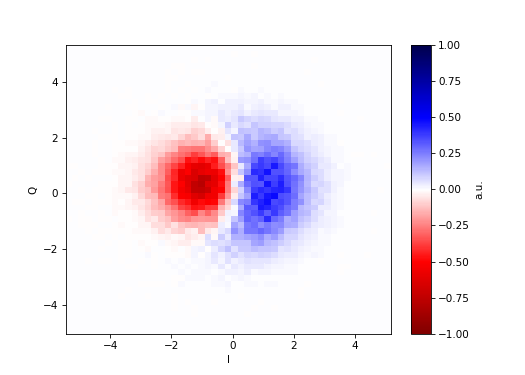

2.314967209412734


In [342]:
pi = np.pi
scale = 1

path = "/Users/andreas/Desktop/work/cluster_state/photon_tomography/measurement_data/"
f_real = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_real.txt'))
f_imag = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_imag.txt'))
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_p1 = (data_real_all + 1j*data_imag_all)
shots_all_p1 = scale * shots_all_p1
f_real.close(); f_imag.close()

f_real = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_real_dark.txt'))
f_imag = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_imag_dark.txt'))
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_dark = (data_real_all + 1j*data_imag_all)
shots_all_dark = scale * shots_all_dark
f_real.close(); f_imag.close()

hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), bins = 50, density = True)
hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[hist_2D_p1[1][0], hist_2D_p1[1][-1]], [hist_2D_p1[2][0], hist_2D_p1[2][-1]]],
                                 bins = 50, density = True)
dI_dQ = (hist_2D_p1[1][0] - hist_2D_p1[1][-1])*(hist_2D_p1[2][0] - hist_2D_p1[2][-1])/2500

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 

print(np.mean(np.abs(shots_all_dark)**2))
pcolor.set_clim(-1,1)

In [185]:
np.mean(shots_all_dark * np.conj(shots_all_dark))

(2.314967209412734+0j)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


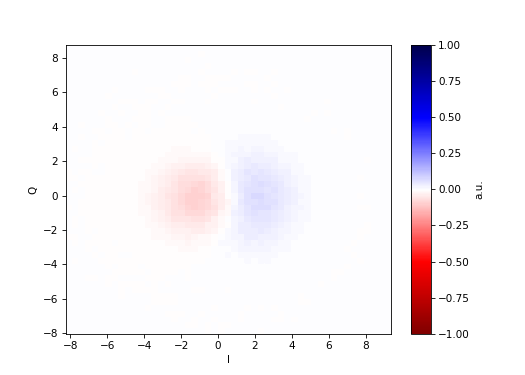

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


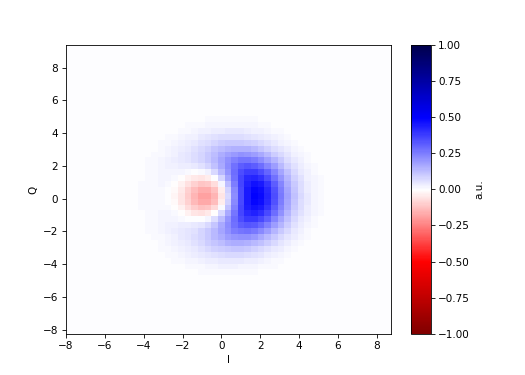

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


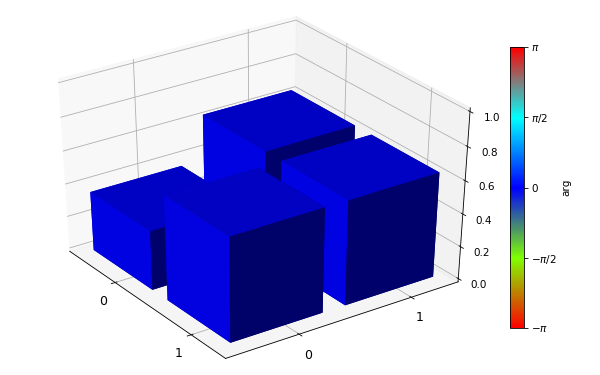

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


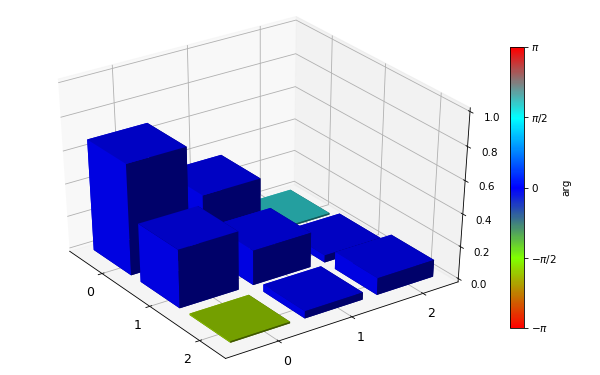

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.68022682+0.j          0.36079841+0.00130845j -0.00259624+0.00910149j]
 [ 0.36079841-0.00130845j  0.21488733+0.j          0.04515622-0.00074844j]
 [-0.00259624-0.00910149j  0.04515622+0.00074844j  0.10488585+0.j        ]]

In [349]:
# f_real = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_real.txt'))
# f_imag = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_imag.txt'))
# data_real = f_real.readlines()
# data_imag = f_imag.readlines()
# data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
# data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
# shots_all_p1 = (data_real_all + 1j*data_imag_all)
# f_real.close(); f_imag.close()

# f_real = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_real_dark.txt'))
# f_imag = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_imag_dark.txt'))
# data_real = f_real.readlines()
# data_imag = f_imag.readlines()
# data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
# data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
# shots_all_dark = (data_real_all + 1j*data_imag_all)
# f_real.close(); f_imag.close()

pi = np.pi
gain_scaling = 4.0931546058599855
global_phase = np.exp(-1j*pi/25)

path = "/Users/andreas/Desktop/work/cluster_state/photon_tomography/measurement_data/"
f_real = open(os.path.join(path, 'Q3_295mV_field_avg_one_photons_calibrated_single_shot_unscaled_dark_real.txt'))
f_imag = open(os.path.join(path, 'Q3_295mV_field_avg_one_photons_calibrated_single_shot_unscaled_dark_imag.txt'))
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,19)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,19)]).flatten()
shots_all_dark = global_phase * (data_real_all + 1j*data_imag_all)/gain_scaling
f_real.close(); f_imag.close()

f_real = open(os.path.join(path, 'Q3_295mV_field_avg_one_photons_calibrated_single_shot_unscaled_pi_half_real.txt'))
f_imag = open(os.path.join(path, 'Q3_295mV_field_avg_one_photons_calibrated_single_shot_unscaled_pi_half_imag.txt'))
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,19)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,19)]).flatten()
shots_all_p1 = global_phase * (data_real_all + 1j*data_imag_all)/gain_scaling
f_real.close(); f_imag.close()

hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), bins = 50, density = True)
hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[hist_2D_p1[1][0], hist_2D_p1[1][-1]], [hist_2D_p1[2][0], hist_2D_p1[2][-1]]],
                                 bins = 50, density = True)
dI_dQ = (hist_2D_p1[1][0] - hist_2D_p1[1][-1])*(hist_2D_p1[2][0] - hist_2D_p1[2][-1])/2500

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-1,1)

#psi = Qobj(np.array([[0, 0], [0,1]]))
psi = (qutip.basis(2,0) + qutip.basis(2,1)).unit()
wigner_sim = qutip.wigner(psi, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
pcolor = ax.pcolormesh(yy, xx, wigner_sim/.15, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-1,1)

a = np.mean(shots_all_p1); hdag_h = np.mean(np.abs(shots_all_dark)**2); 
hdag_2_h_2 = np.mean(np.abs(shots_all_dark)**4) 
adag_a = np.mean(np.abs(shots_all_p1)**2) - hdag_h
a_2 = np.mean(shots_all_p1**2); 
adag_2_a = np.mean(np.conj(shots_all_p1)*np.abs(shots_all_p1)**2) - 2 * np.conj(a) * hdag_h
adag_2_a_2 = np.mean(np.abs(shots_all_p1)**4) - 4*adag_a*hdag_h - hdag_2_h_2

loss_scaling = 0.6665061576492075

rho = qutip.Qobj(np.array([[1 - adag_a, a], [np.conj(a), adag_a]]))
rho = (rho - (1- loss_scaling) * np.array([[1,0],[0,0]]))/loss_scaling


fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(rho, fig=fig, ax=ax) 
rho

rho_from_moments = np.zeros((3,3), dtype = complex)

rho_from_moments[0,0] = 1 - adag_a +  adag_2_a_2/2
rho_from_moments[0,1] = a - np.conj(adag_2_a)
rho_from_moments[0,2] = a_2/np.sqrt(2)

rho_from_moments[1,0] = np.conj(rho_from_moments[0,1])
rho_from_moments[1,1] = adag_a - adag_2_a_2
rho_from_moments[1,2] = np.conj(adag_2_a)/np.sqrt(2)


rho_from_moments[2,0] = np.conj(rho_from_moments[0,2])
rho_from_moments[2,1] = np.conj(rho_from_moments[1,2])
rho_from_moments[2,2] = adag_2_a_2/2

#rho_from_moments = (rho_from_moments - (1- loss_scaling) * np.array([[1,0,0],[0,0,0],[0,0,0]]))/loss_scaling
fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(qutip.Qobj(rho_from_moments).unit(), fig=fig, ax=ax) 
qutip.Qobj(rho_from_moments)

../../utils/visualization/state_visualization.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


<IPython.core.display.Javascript object>


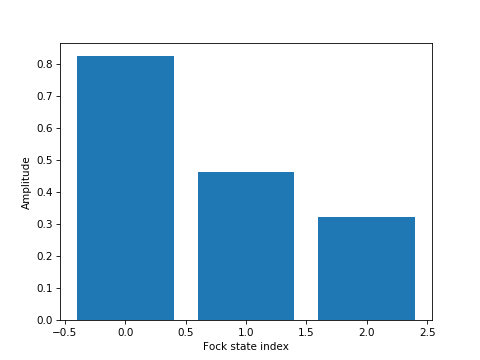

In [350]:
state_vis.plot_fock_basis_amplitudes(qutip.Qobj(rho_from_moments).unit())

In [327]:
max_x = 8.5
mesh_size = 0.5
number_of_noise_photons = 1.33

# Define the range of dimensions
dim = 100

noise_state = qutip.thermal_dm(dim, number_of_noise_photons)

s = time.time()
clean_povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim,
                                                              #noise_base = reconstructed_dark_state,
                                                              cutoff=0)
e = time.time()
print('Constructing POVM took: ' + str(e - s) + str(' seconds'))

Constructing POVM took: 13.693499088287354 seconds


In [328]:
hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), 
                                 range = [[xs[0] - mesh_size/2, xs[-1] + mesh_size/2],[ps[0] - mesh_size/2, ps[-1] + mesh_size/2]],
                                 bins = len(xs), density = True)[0]

hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[xs[0] - mesh_size/2, xs[-1] + mesh_size/2],[ps[0] - mesh_size/2, ps[-1] + mesh_size/2]],
                                 bins = len(xs), density = True)[0]

# su.average_over_histogram(hist_2D_dark, np.abs(alphas)**(2), mesh_size**2)

# hist_2D_dark = qutip.qfunc(noise_state, xs, ps, g=2)

# input_state = (qutip.basis(dim, 0) + 1j * qutip.basis(dim, 1)).unit()
# input_rho = input_state * input_state.dag()
# hist_2D_dark = cst2.evaluate_thermally_noisy_Q_function(input_rho, number_of_noise_photons, xs, ps)
# thermal_qfunc = qutip.qfunc(noise_state, xs, ps, g=2)

# su.average_over_histogram(thermal_qfunc, np.abs(alphas)**(2), mesh_size**2)

In [193]:
max_x = 8.5
mesh_size = 0.5
number_of_noise_photons = 2
dim = 300

# This call is just to generate the mesh of alphas used to construct the Q function
# of the thermal state
noisy_povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim,
                                                              cutoff=0)

# Generate the thermal state Q function
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
thermal_qfunc = qutip.qfunc(noise_state, xs, ps, g=2)

# Compute the average of |alpha|**2 with respect to the Q function
su.average_over_histogram(thermal_qfunc, np.abs(alphas)**(2), mesh_size**2)

2.9999999982248324

<IPython.core.display.Javascript object>


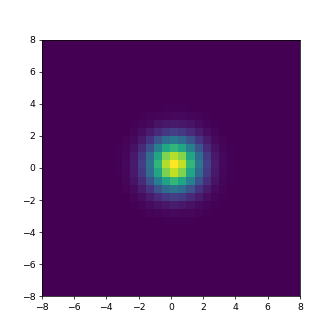

4.0


In [175]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pcolormesh(xs, ps, hist_2D_dark)
print(np.sum(hist_2D_dark))

In [331]:
# number_of_noise_photons = 4.4
# noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
state0 = (qutip.basis(dim, 0) + 1j * qutip.basis(dim, 1)).unit()
rho0 = state0 * state0.dag()

# Perform ideal coherent state POVM MLE
number_of_mle_iterations = 200
s = time.time()
reconstructed_dark_state, lls = \
    cst2.perform_coherent_state_MLE(
        clean_povm,
        hist_2D_dark, 
        number_of_mle_iterations,
        frequency_threshold=0,
        cutoff=0,
        identity_mixin=0)
e = time.time()
print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')

Time for MLE reconstruction for dim = 100: 215.08907008171082 s


0.9999097698861058


<IPython.core.display.Javascript object>


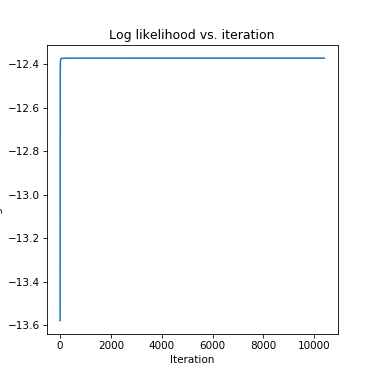

Text(0.5, 1.0, 'Log likelihood vs. iteration')

In [325]:
lls_cat = np.concatenate((lls, lls_2, lls_3))
print(reconstructed_dark_state.tr())
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(len(lls_cat)), lls_cat)
ax.set_ylabel('Log likelihood')
ax.set_xlabel('Iteration')
ax.set_title('Log likelihood vs. iteration')

35


<IPython.core.display.Javascript object>


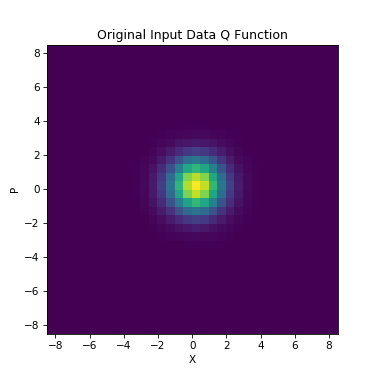

<IPython.core.display.Javascript object>


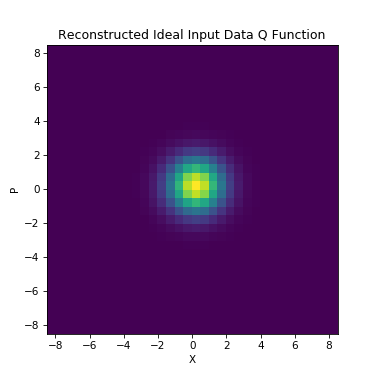

<IPython.core.display.Javascript object>


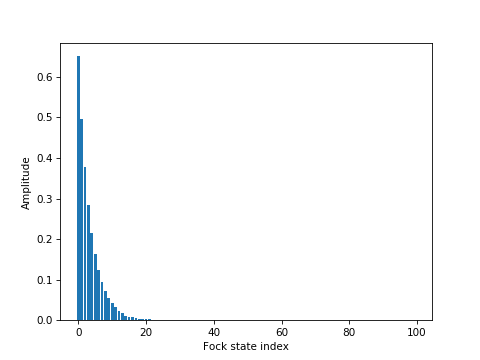

In [332]:
print(len(hist_2D_dark))
cst2.plot_coherent_state_tomography_Q_functions(hist_2D_dark,
                                               reconstructed_dark_state,
                                               xs,
                                               ps)

<IPython.core.display.Javascript object>


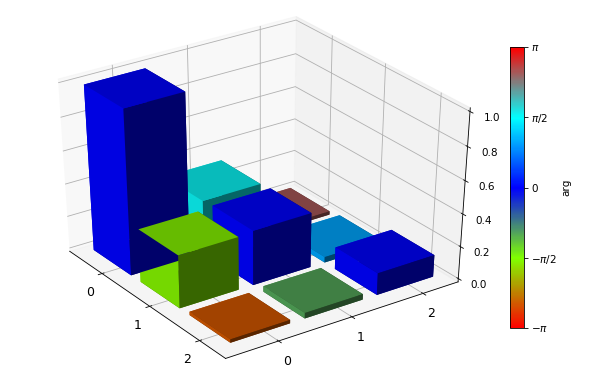

(<Figure size 800x500 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1bafff2ad0>)

In [315]:
moments = qou.compute_matrix_of_moments(reconstructed_dark_state, 3)
fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(qutip.Qobj(moments), fig=fig, ax=ax) 

# fig = plt.figure( figsize=(8,5) )
# ax = Axes3D(fig, azim=-35, elev=35)
# qutip.matrix_histogram_complex(reconstructed_dark_state, fig=fig, ax=ax) 

<IPython.core.display.Javascript object>


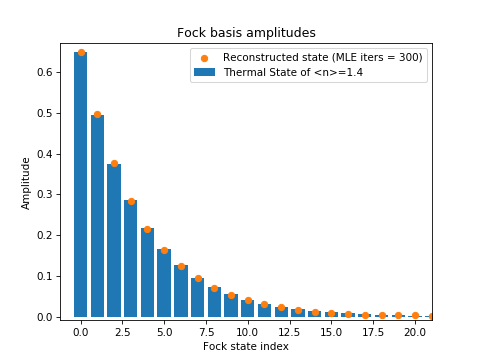

In [337]:
number_of_noise_photons = 1.38
# Define the range of dimensions
dim = 100
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
legend_labels = {'ref': 'Thermal State of <n>=1.4', 'data': 'Reconstructed state (MLE iters = 300)'}
state_vis.plot_fock_basis_amplitudes_with_reference(reconstructed_dark_state,
                                                    noise_state,
                                                    legend_labels, 
                                                    title='Fock basis amplitudes')

<IPython.core.display.Javascript object>


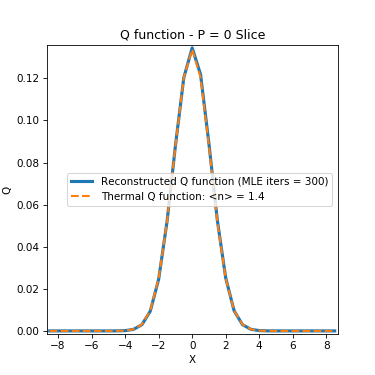

In [339]:
number_of_noise_photons = 1.38
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
noisy_qfunc = qutip.qfunc(noise_state, xs, ps, g=2)
reconstructed_qfunc = qutip.qfunc(reconstructed_dark_state, xs, ps, g=2)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(xs, reconstructed_qfunc[len(xs) // 2], linewidth=3, label='Reconstructed Q function (MLE iters = 300)')
ax.plot(xs, noisy_qfunc[len(xs) // 2], linestyle='dashed', linewidth=2, label='Thermal Q function: <n> = 1.4')
ax.set_xlabel('X')
ax.set_ylabel('Q')
ax.set_title('Q function - P = 0 Slice')
ax.legend()
ax.margins(0.01)

<IPython.core.display.Javascript object>


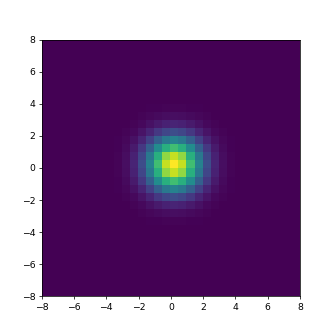

3.9999999999999996


In [60]:
hist_2D = np.histogram2d(np.real(shots_all), np.imag(shots_all), 
                                 range = [[xs[0] - mesh_size/2, xs[-1] + mesh_size/2],[ps[0] - mesh_size/2, ps[-1] + mesh_size/2]],
                                 bins = len(xs), density = True)[0]
fig, ax = plt.subplots(figsize=(5, 5))
ax.pcolormesh(xs, ps, hist_2D_dark)
print(np.sum(hist_2D))

In [288]:
# Define the range of dimensions
dim = 300

noise_state = reconstructed_dark_state

s = time.time()
noisy_povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim,
                                                              noise_base=noise_state,
                                                              cutoff=0)
e = time.time()
print('Constructing POVM took: ' + str(e - s) + str(' seconds'))

Constructing POVM took: 155.97373008728027 seconds


In [294]:
# Perform ideal coherent state POVM MLE
number_of_mle_iterations = 2000
s = time.time()
reconstructed_dark_state, lls = \
    cst2.perform_coherent_state_MLE(
        noisy_povm,
        hist_2D, 
        number_of_mle_iterations,
        frequency_threshold=0,
        cutoff=1e-12,
        identity_mixin=0)
e = time.time()
print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')

Time for MLE reconstruction for dim = 100: 13622.832628011703 s


81


../../utils/tomography/coherent_state_tomography_copy.py:314: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, num_data_sets, figsize=(5*num_data_sets, 5))


<IPython.core.display.Javascript object>


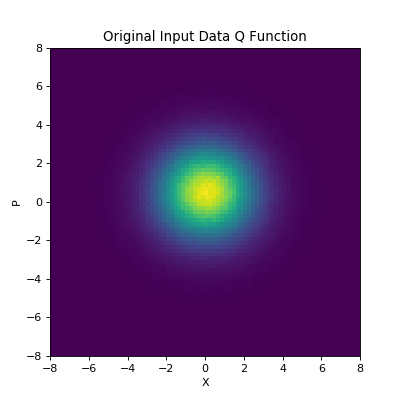

../../utils/tomography/coherent_state_tomography_copy.py:332: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, num_data_sets, figsize=(5*num_data_sets, 5))


<IPython.core.display.Javascript object>


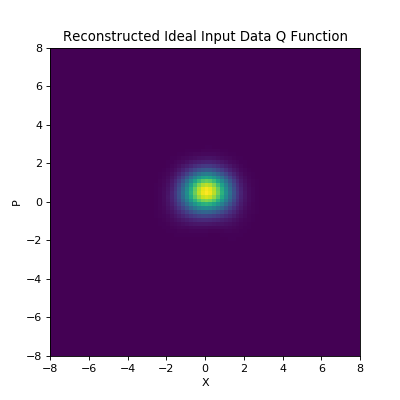

../../utils/visualization/state_visualization.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


<IPython.core.display.Javascript object>


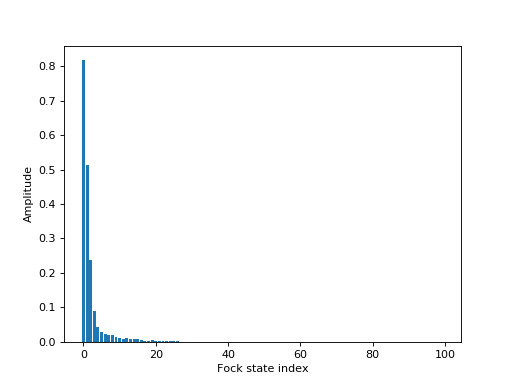

In [295]:
print(len(hist_2D_dark))
cst2.plot_coherent_state_tomography_Q_functions(hist_2D,
                                               reconstructed_dark_state,
                                               xs,
                                               ps)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


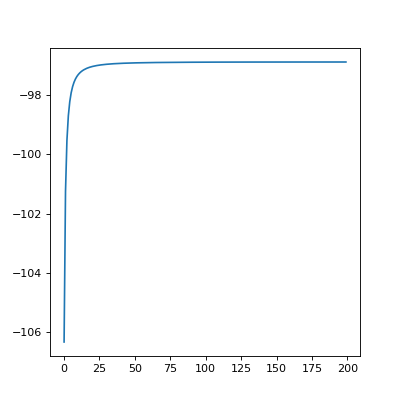

In [293]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(len(lls)), lls)